# 11.1 Cross-Validating Models

I want to evaluate how well my model will work in the real world.

In [13]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load digits datasets
digits = datasets.load_digits()
# Create features matrix
features = digits.data
# Create target vector
target = digits.target
# Create standardizer
standardizer = StandardScaler()
# Create logistic regression object
logit = LogisticRegression()
# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)
# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Conduct k-Fold cors-validation
cv_results = cross_val_score(pipeline,  # Pipeline
                             features,  # Feature matrix
                             target,    # Target vector
                             cv=kf,     # Corss-validation technique
                             scoring='accuracy',  # Loss finction
                             n_jobs= -1) # Use all CPU scores
# Calculate mean
cv_results.mean()

0.964931719428926

In [14]:
# View score for all 10 folds
cv_results

array([0.97222222, 0.97777778, 0.95555556, 0.95      , 0.95555556,
       0.98333333, 0.97777778, 0.96648045, 0.96089385, 0.94972067])

In [18]:
from sklearn.model_selection import train_test_split

# Create training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)
# Fit standardizer to training set
standardizer.fit(features_train)
# Apply to both training and test sets
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

# Create a pipeline
pipeline = make_pipeline(standardizer, logit)
# Do k-Fold cross-validation
cv_results = cross_val_score(pipeline,  # Pipeline
                             features,  # Feature matrix
                             target,    # Target vector
                             cv=kf,     # Corss-validation technique
                             scoring='accuracy',  # Loss finction
                             n_jobs= -1) # Use all CPU scores
cv_results

array([0.97222222, 0.97777778, 0.95555556, 0.95      , 0.95555556,
       0.98333333, 0.97777778, 0.96648045, 0.96089385, 0.94972067])

# 11.2 Creating a Baseline Regression Model

I want a simple baseline regression model to compare against my model.

In [24]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# Load data
boston = load_boston()
# Create features
features, target = boston.data, boston.target
# Make test and training split
features_train, features_test, target_train, 
target_test = train_test_split(features, target, random_state=0)
# Create a dummy regressor
dummy = DummyRegressor(strategy='mean')
# 'Train' dummy regressor
dummy.fit(features_train, target_train)
# Get R-squared score
dummy.score(features_train, target_train)
# test

0.0

In [28]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(features_train, target_train)
# Get R-squared score
ols.score(features_train, target_train)
# test

0.5977551962946686

To compare, we train our model and evaluate the performance score:

In [30]:
# Create dummy regressor that predicts 20's for everything
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)
# Evaluate score
clf.score(features_train, target_train)

-29.00527322882046

# 11.3 Creating a Baseline Classification Model

I have a simple baseline classifier to compare against your model.

In [32]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()
# Create target vector and feature matrix
features, target = iris.data, iris.target
# Split into training and test set
features_train, features_test, target_train, 
target_test = train_test_split(features, target, random_state=0)
# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)
# 'Train' model
dummy.fit(features_train, target_train)
# Get accuracy score
dummy.score(features_train, target_train)

0.09956709956709957

By comparing the baseline classifier to our trained classifier, we can see the improvement:

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Create classifier
classifier = RandomForestClassifier()
# Train model
classifier.fit(features_train, target_train)
# Get accuracy score
classifier.score(features_train, target_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

# 11.4 Evaluating Binary Classifier Predictions

Given a trained classification model, you want to evaluate its quality.

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate features matrix and target vector
X, y = make_classification(n_samples=10000,
                           n_features=3,
                           n_informative=3,
                           n_redundant=0,
                           n_classes=2,
                           random_state=1)
# Create logistic regression
logit = LogisticRegression()
# Cross-validate model using accuracy
cross_val_score(logit, X, y, scoring='accuracy')

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95170966, 0.9580084 , 0.95558223])

In [36]:
# Cross-validate model using precision
cross_val_score(logit, X, y, scoring='precision')

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95252404, 0.96583282, 0.95558223])

In [37]:
# Cross-validate model using recall
cross_val_score(logit, X, y, scoring='recall')

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95080984, 0.94961008, 0.95558223])

In [38]:
# Cross-validate model using f1
cross_val_score(logit, X, y, scoring='f1')
# shows that of observations labeled as positive, 
# how many are actually positive

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95166617, 0.95765275, 0.95558223])

If we have the true y values and predicted y values, 

we can calculate metrics like accuracy and recall directly.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=1)
# Predict values for training target vector
y_hat = logit.fit(X_train, y_train).predict(X_test)
# Calculate accuracy
accuracy_score(y_test, y_hat)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.947

# 11.5 Evaluating Binary Classifier Threshold

The Receving Operating Characteristic (ROC) curve is a common method for evaluating the quality of a binary classifier.

In [68]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Create feature matrix and target vector
features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)
# Split into training and test set
features_train, features_test, target_train, 
target_test = train_test_split(features, target, 
                              test_size=0.1, 
                              random_state=1)
# Create classifier 
logit = LogisticRegression()
# Train model
logit.fit(features_train, target_train)
# Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]
# Create true and false positive rates
false_positve_rate, true_positive_rate, threshold = roc_curve(target_test,
                                                              target_probabilities)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls='- -')
plt.plot([0, 0], [1, 0], c='0.7'), plt.plot([1, 1], c='0.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ValueError: unknown format is not supported

In [45]:
# Get predicted probabilities
logit.predict_proba(features_test)[0:1]

array([[2.68520156e-12, 9.63011822e-01, 1.80280831e-07, 3.22834600e-14,
        1.95979250e-08, 5.65683254e-07, 2.04782923e-08, 2.99888423e-08,
        3.69871825e-02, 1.79603168e-07]])

In [46]:
logit.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
#print('Threshold:', threshold[116])

# 11.6 Evaluating Multiclass Classifier Predictions

I have a model that predicts three or more classes and want to evaluate its performance.

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate features matrix and target vector
features, target = make_classification(n_samples=10000,
                                       n_features=3,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=3,
                                       random_state=1)
# Create logistic regression
logit = LogisticRegression()
# Cross-validate model using accuracy
cross_val_score(logit, features, target, scoring='accuracy')

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWar

array([0.83653269, 0.8259826 , 0.81308131])

In [55]:
# Cross-validate model using macro averaged F1 score
cross_val_score(logit, features, target, scoring='f1_macro')

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWar

array([0.83613125, 0.82562258, 0.81293539])

# 11.7 Visualizing a Classifier's Performance

Given predicted classes and true classes of the test data, you want to visually compare the model's quality.

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# Load data
iris = datasets.load_iris()
# Create feature matrix
features = iris.data
# Create target vector 
target = iris.target
# Create list of target class names
class_names = iris.target_names
# Create training and test set
features_train, features_test, target_train,
target_test = train_test_split(features, target, random_state=1)
# Create logistic regression 
logit = LogisticRegression()
# Train model and make predictions
target_predicted = classifier.fit(features_train, target_train).predict(features_test)
# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix'), plt.tight_layout()
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [4, 180]

# 11.8 Evaluating Regression Models

In [76]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Generate features matrix, target vector
features, target = make_regression(n_samples=100,
                                   n_features=3,
                                   n_informative=3,
                                   n_targets=1,
                                   noise=50,
                                   coef=False,
                                   random_state=1)
# Create a linear regression object
ols = LinearRegression()
# Cross-validate the linear regression using (negative) MSE
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([-1718.22817783, -3103.4124284 , -1377.17858823])

In [77]:
# Cross-validate the linear regression using R-squared
cross_val_score(ols, features, target, scoring='r2')

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.87804558, 0.76395862, 0.89154377])

# 11.9 Evaluating Clustering Models

I have an unsupervised learning algorithm to cluster my data.

Now I want to know how well it did.

In [82]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate feature matrix 
features, _ = make_blobs(n_samples=1000,
                         n_features=10,
                         centers=2,
                         cluster_std=0.5,
                         shuffle=True,
                         random_state=1)
# Cluster data using k-means to predict classes
model = KMeans(n_clusters=2, random_state=1).fit(features)
# Get predicted classes 
target_predicted = model.labels_
# Evaluate model 
silhouette_score(features, target_predicted)

0.8916265564072142

# 11.10 Creating a Custom Evaluation Metric

I want to evaluate a model using a metric I created.

In [93]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# Generate features matrix and target vector
features, target = make_regression(n_samples=100,
                                   n_features=3,
                                   random_state=1)
# Create training set and test set
features_train, features_test, target_train, 
target_test = train_test_split(features, target, 
                               test_size=0.1, random_state=1)
# Create custom metric
def custom_metric(target_test, target_predicted):
    # Calculate r-squared score
    r2 = r2_score(target_test, target_predicted)
    # Returen r-squared score
    return r2
# Make scorer and define that higher scores are better 
score = make_scorer(custom_metric, greater_is_better=True)
# Create ridge regression object
classifier = Ridge()
# Train ridge regression model
model = classifier.fit(features_train, target_train)
# Apply custom scorer
score(model, features_test, target_test)

ValueError: Found input variables with inconsistent numbers of samples: [4, 180]

In [94]:
# Predicted values
target_predicted = model.predict(features_test)
# Calculate r-squared score
r2_score(target_test, target_predicted)

ValueError: Found input variables with inconsistent numbers of samples: [4, 180]

# 11.11 Visualizing the Effect of Training Set Size

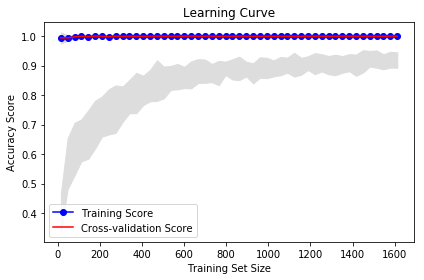

In [112]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# Load data
digits = load_digits()
# Create feature matrix and target vector
features, target = digits.data, digits.target
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(# Classifier
                                                        RandomForestClassifier(),
                                                        # Feature Matrix
                                                        features,
                                                        # Target Vector
                                                        target,
                                                        # Number of folds
                                                        cv=10,
                                                        # Performance Metric
                                                        scoring='accuracy',
                                                        # Use all cpu
                                                        n_jobs=-1,
                                                        # Size of 50
                                                        # Training set
                                                        train_sizes=np.linspace(
                                                        0.01,
                                                        1.0,50))
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Draw lines
plt.plot(train_sizes, train_mean, '-o', 
         color='blue', label='Training Score')
plt.plot(train_sizes, train_mean,
         color='red', label='Cross-validation Score')
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color='#DDDDDD')
# Create plot
plt.title('Learning Curve')
plt.xlabel('Training Set Size'), plt.ylabel('Accuracy Score'), 
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 11.12 Creating a Text Report of Evaluation Metrics

I want a quick description of a classifier's performance.

In [116]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
iris = datasets.load_iris()
# Create feature matrix
features = iris.data
# Create target vector
target = iris.target
# Create list of target class names
class_names = iris.target_names
# Create training set and test set
features_train, features_test, target_train, 
target_test = train_test_split(features, target, random_state=1)
# Create logistic regression
classifier = LogisticRegression()
# Train model and make prediction
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)
# Create a classification report
print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [4, 180]

# 11.13 Visualizing the Effect of Hyperparameter Values

I wnat to understand how the performance of a model changes as the value of some hyperparameter changes.

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# Load data
digits = load_digits()
# Create feature matrix and target vector
feature, target = digits.data, digits.target
# Create range of values for parameter
param_range = np.arange(1, 250, 2)
# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(# Classifier
                                             RandomForestClassifier(),
                                             # Feature Matrix
                                             features,
                                             # Target Vector
                                             target,
                                             # Hyperparameter to examine
                                             param_name='n_estimators',
                                             # Range of hyperparameter's values
                                             param_range=param_range,
                                             # Number of folds
                                             cv = 3,
                                             # Performance Metric
                                             scoring='accuracy',
                                             # Use all cpu
                                             n_jobs = -1)
# Calculate means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, 
         label='Training Score', color='black')
plt.plot(param_range, test_mean, 
         label='Cross-validation Score', color='dimgrey')
# Plot accuracy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, color='gray')
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color='gainsboro')
# Create plot
plt.title('Validation Curve With Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [150, 1797]